# 2.2 - Linear Predictive Coding

<img style="float: right; margin:5px 0px 0px 10px" src="img/2-title.jpg" width="500">
Die lineare predictive coding (LPC) ist ein Verfahren, das hauptsächlich in der Audiosignalverarbeitung und Sprachverarbeitung verwendet wird, um die Spektralhüllkurve eines digitalen Sprachsignals in komprimierter Form unter Verwendung der Informationen eines linearen Vorhersagemodells darzustellen. Es ist eine der leistungsstärksten Sprachanalysetechniken und eine der nützlichsten Methoden zum Codieren von Sprache guter Qualität mit einer niedrigen Bitrate und liefert hochgenaue Schätzungen von Sprachparametern. LPC ist die am weitesten verbreitete Methode in der Sprachcodierung und Sprachsynthese.

## Inhalt  
<table style="width:256px; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:right"><img src="img/2-1.png" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#1'>
                1. Grundlagen
            </a>
        </td>
    </tr>    
    <tr>
        <td  style="text-align:right" width=64px><img src="img/2-2.png" style="float:left"></td>
        <td style="text-align:left" width=256px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#2'>
                2. Anwendungsbeispiel
            </a>
        </td>
    </tr>  
</table>

----

<a id='1'></a>
<div>
    <img src="img/2-1.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        1. Grundlagen
    </h2>
</div>

<img style="float:top; margin:5px 0px 0px 10px" src="img/Quelle-Filter-Modell.jpg" width="800">

Die Quell-Filter-Sprachsynthese basiert auf einer akustischen Theorie, die glaubt, dass Schall durch Anregung und entsprechende Filter gebildet wird.   

Die Sprache wird von unserem Soundsystem erzeugt, das mit einer einfachen Schallquelle und einem Kanalmodell simuliert werden kann. Die Schallquelle wird von den Stimmbändern erzeugt. Die Stimmbänder liefern Erregungssignale für den Soundtrack. Diese Erregung kann periodisch oder nicht periodisch sein. Wenn sich die Stimmbänder in einem vokalisierten Zustand befinden (Vibration), werden Stimmgeräusche (zum Beispiel Vokale) erzeugt, wenn sich die Stimmbänder in einem stillen Zustand befinden, werden stille Geräusche (zum Beispiel Konsonanten) erzeugt. Der Kanal kann als Filter betrachtet werden, der das Spektrum des Anregungssignals von den Stimmbändern umformen kann, um verschiedene Klänge zu erzeugen. 

Bei der quellfilterbasierten Parametersynthese kann der Synthesizer-Workflow in drei Schritte unterteilt werden:

- die entsprechende Glottalwellen-Anregungsquelle gemäß den tonalen Eigenschaften der zu synthetisierenden Silbe konstruieren  
- ein neues Vokaltrakt-Parametermodell auf der Grundlage des ursprünglichen Vokaltrakts auf der Grundlage der Schalländerungsinformationen wie Koartikulation und Geschwindigkeitsänderung (Dauerparameter) erstellen  
- die Glottalwellen-Anregungsquelle an das neue Vokaltraktmodell senden, die Ausgabe ist die synthetisierte Sprache, die die gegebenen prosodischen Eigenschaften erfüllt

LPC ist die auf diesem Modell basierende Sprachgenerierungstechnologie. In diesem Modell wird das Sprachsignal durch ein Anregungssignal durch ein zeitvariables Allpolfilter erzeugt. Der Koeffizient des Allpolfilters hängt von der Kanalform des spezifischen erzeugten Klangs ab. Das Anregungssignal ist entweder eine Impulsfolge von stimmhafter Sprache oder zufälliges Rauschen von leisem Ton. 

#### Grundidee:   
Die Grundidee der LPC ist, der aktuelle Wert einer Sprachprobe kann durch eine gewichtete lineare Kombination der vergangenen Werte mehrerer Sprachproben angenähert werden. Die Gewichtungskoeffizienten in der linearen Kombination werden Prädiktor-Koeffizienten genannt. Indem die Summe der Quadrate der Differenzen zwischen den tatsächlichen Sprachabtastwerten und den linearen Vorhersageabtastwerten auf ein Minimum reduziert wird, kann ein eindeutiger Satz von Prädiktor-Koeffizienten bestimmt werden.

Die Abtastwerte eines Signals $y(k)$, die durch lineare Filterung eines (unbekannten) Eingangssignals entstanden sind, sind nicht vollständig unabhängig voneinander. Statt dessen lässt sich jeder Abtastwert $y(k)$ aus endlich vielen vorangegangenen Abtastwerten durch folgende Prädiktorgleichung annähern:
\begin{equation}
\hat{y}(k)=\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Für jeden Abtastwert wird damit ein gewisser Prädiktionsfehler $e(k)$ gemacht:
\begin{equation}
e(k)=y(k)-\hat{y}(k)=y(k)-\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Die $a_{i}$ werden geschätzt, indem der mittlere quadratische Fehler im betrachteten Signalabschnitt minimiert wird.
Bei der Analyse werden die Koeffizienten $a_{i}$ derart bestimmt, dass die Summe der Prädiktionsfehlerquadrate innerhalb eines endlichen Zeitfensters der Länge $L$ minimal wird.  

Die Gleichung für $y(k)$ entspricht formal der Rekursionsgleichung für einen IIR-Allpol-Filter $H(z)$, wobei das Fehlersignal als (mit der Verstärkung $G$ skaliertes) Eingangssignal $x(k)$ betrachtet werden kann:
\begin{equation}
y(k)=e(k)+\sum_{i=1}^{N}a_{i}y(k-i)=Gx(k)+\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Die Systemfunktion ist somit
\begin{equation}
H(z)=\frac{Y(z)}{E(z)}=\frac{1}{1-\sum_{i=1}^{N}a_{i}z^{-i}}
\end{equation}

Dieser Filter ist sogenannter __LPC-Synthesefilter__. Der Amplitudengang des Synthesefilters entspricht bei einem weißen Anregungsspektrum der
Hüllkurve im Frequenzbereich.

Umgekehrt lässt sich das Fehlersignal $e(k)$ durch die Filterung von $y(k)$ mit dem inversen Filter $A(z) = 1/H(z)$ bestimmen. Dieser Filter wird als __Analysefilter__ bezeichnet.

<img style="float:top; margin:5px 0px 0px 10px" src="img/lpc.png" width="800">

----

<a id='2'></a>
<div>
    <img src="img/2-2.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        2.  Anwendungsbeispiel
    </h2>
</div>

LPC findet breite Anwendung in der Spracherkennung, Sprachsynthese und Sprachkompression Kodierung. Als Beispiel hier verwenden wir die lineare Prädiktion zur Formanterkennung, d.h., um die Formantfrequenzen (Resonanzfrequenzen) des Vokaltrakts zu schätzen.

Der Vokaltrakt kann als Schallröhre mit ungleichmäßigem Querschnitt betrachtet werden, die während des Schalls als Formant fungiert. Wenn der quasi-periodische Puls an der Stimmritze in den Vokaltrakt angeregt wird, verursacht er Resonanzeigenschaften und erzeugt einen Satz von Resonanzfrequenzen. Dieser Satz von Resonanzfrequenzen wird Resonanzspitzenfrequenzen oder einfach Formantenspitzen genannt.

Im klassischen Sprachsignalmodell entspricht der Formante dem komplexen Polpaar der Übertragungsfunktion. Daher besteht der Schlüssel der Formantenschätzung darin, die Sprachspektralhüllkurve zu schätzen und zu berücksichtigen, dass der Maximalwert in der Spektralhüllkurve der Formante ist.

Ausgehend von einem kurzen Abschnitt des Signals werden die Prädiktorkoeffizienten geschätzt. Diese bestimmen die Pole der Systemfunktion des Synthesefilters $H(z)=1/[1-\sum_{i=1}^{N}a_{i}z^{-i}]$.

Zuerst importieren wir zu nutzende Packages und laden das Audiosignal „Akustik“:

In [1]:
# Packages importieren
import matplotlib.pyplot as plt
import numpy as np
import simpleaudio as sa
import scipy 
import librosa
from scipy.io import wavfile

In [2]:
# Audiosignal laden
fs_Hz, audioSignal = wavfile.read('data/akustik.wav')   # Sample Rate, Audiosignal im Array-Form
audioSignal = audioSignal/np.max(np.abs(audioSignal))   # Normalisierung
signalLength = len(audioSignal)                         # Länge des Audiosignals
T_s = signalLength/fs_Hz - 1/fs_Hz                      # Zeit
t_s = np.linspace(0, T_s, signalLength)                 # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, signalLength//2)         # Frequenzbereich

Und segmentieren das Signal, um Spektrum des /a/-Vokaltrakts zu berechnen:

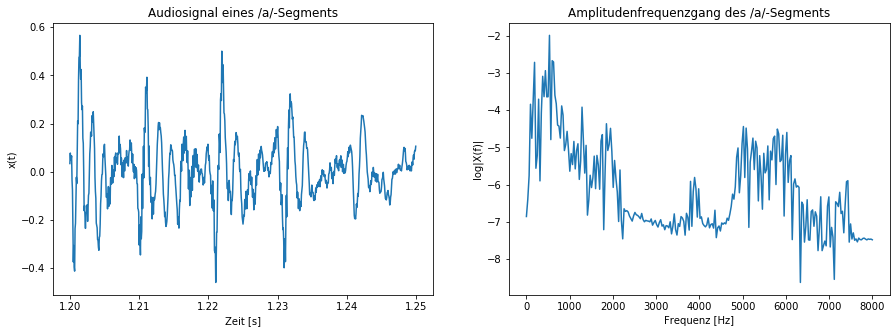

In [3]:
'''
Beispiel: Spektrum eines 50 ms langen /a/-Segments des Wortes „Akustik“ berechnen
''' 
# Zeitintervall bestimmen
n_start = int(1.20 / T_s * signalLength)                # Startsample-Nummer
n_end = int(1.25 / T_s * signalLength)                  # Endsample-Nummer
t_aSegment_s = t_s[n_start:n_end]

# Audiosignal segmentieren
a_segment = audioSignal[n_start:n_end]               

# Spektrum berechnen
n_fft = int(2**(np.floor(np.log2(len(a_segment)))))     # Länge von FFT
f_aSegment_Hz = np.linspace(0, fs_Hz/2, int(n_fft/2))   # Frequenzbereich
aSegment_fft = scipy.fftpack.fft(a_segment, n_fft)
aSegment_fft_plot = np.abs(aSegment_fft[:len(f_aSegment_Hz)]) / int(n_fft/2)

# Graphische Darstellung 
plt.subplot(121)
plt.title('Audiosignal eines /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_aSegment_s, a_segment)
plt.subplot(122)
plt.title('Amplitudenfrequenzgang des /a/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_aSegment_Hz, np.log(aSegment_fft_plot))
plt.gcf().set_size_inches(15, 5)
plt.show()

# Abspielen
sound = (a_segment*(2**15-1)/np.max(np.abs(a_segment))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
play_obj.wait_done()

Ähnlich können Sie das Spektrum eines 30 ms langen /u/-Segments des Wortes „Akustik“ berechnen:

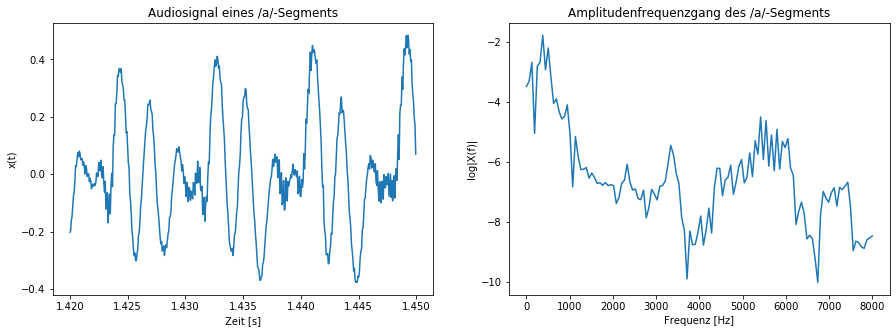

In [4]:
'''
Spektrum eines 30 ms langen /u/-Segments des Wortes „Akustik“ berechnen
''' 
# Zeitintervall bestimmen
n_start = int(1.42 / T_s * signalLength)                # Startsample-Nummer
n_end = int(1.45 / T_s * signalLength)                  # Endsample-Nummer
t_uSegment_s = t_s[n_start:n_end]

# Audiosignal segmentieren
u_segment = audioSignal[n_start:n_end]                  

# Spektrum berechnen
n_fft = int(2**(np.floor(np.log2(len(u_segment)))))     # Länge von FFT
f_uSegment_Hz = np.linspace(0, fs_Hz/2, int(n_fft/2))   # Frequenzbereich
uSegment_fft = scipy.fftpack.fft(u_segment, n_fft)
uSegment_fft_plot = np.abs(uSegment_fft[:len(f_uSegment_Hz)]) / int(n_fft/2)

# Graphische Darstellung
plt.subplot(121)
plt.title('Audiosignal eines /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_uSegment_s, u_segment)
plt.subplot(122)
plt.title('Amplitudenfrequenzgang des /a/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_uSegment_Hz, np.log(uSegment_fft_plot))
plt.gcf().set_size_inches(15, 5)
plt.show()

# Abspielen
sound = (u_segment*(2**15-1)/np.max(np.abs(u_segment))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
play_obj.wait_done()

Jetzt können wir LP-Koeffizienten berechnen, um die Pole der Systemfunktion des Synthesefilters zu bestimmen. Zum Berechnen der LP-Koeffizienten können wir die Funktion [librosa.lpc(y, order)](https://librosa.org/doc/latest/generated/librosa.lpc.html) verwenden:

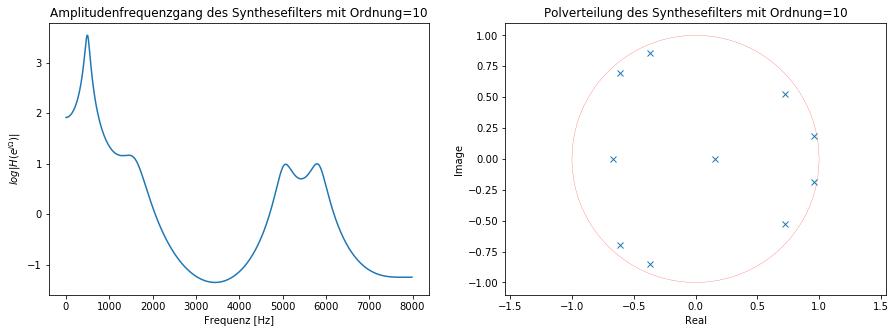

In [5]:
'''
Beispiel: Die LP-Koeffizienten des /a/-Segments berechnen und die Frequenzgang bzw. Polverteilung des Synthesefilters aufzeichnen
'''
N = 10                                            # Modellordnung
b, a = [1], librosa.lpc(a_segment, N)             # LP-Koeffizienten bestimmen
fH_Hz, H = scipy.signal.freqz(b, a, fs=fs_Hz)     # Amplitudenfrequenzgang
z, p, k = scipy.signal.tf2zpk(b, a)               # Null-Pol Verteilung

# Graphische Darstellung
plt.subplot(121)
plt.title('Amplitudenfrequenzgang des Synthesefilters mit Ordnung=%d' %N)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('$log|H(e^{jΩ})|$')
plt.plot(fH_Hz, np.log(np.abs(H)))
plt.subplot(122)
plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
plt.plot(np.real(p), np.imag(p), 'x')
plt.axis("equal")
plt.gcf().set_size_inches(15, 5)
plt.show()

Kritisch ist dabei die Wahl der „richtigen“ Modellordnung N. Daher implementieren Sie bitte die Filter zum Vergleich mit verschiedenen Ordnung:

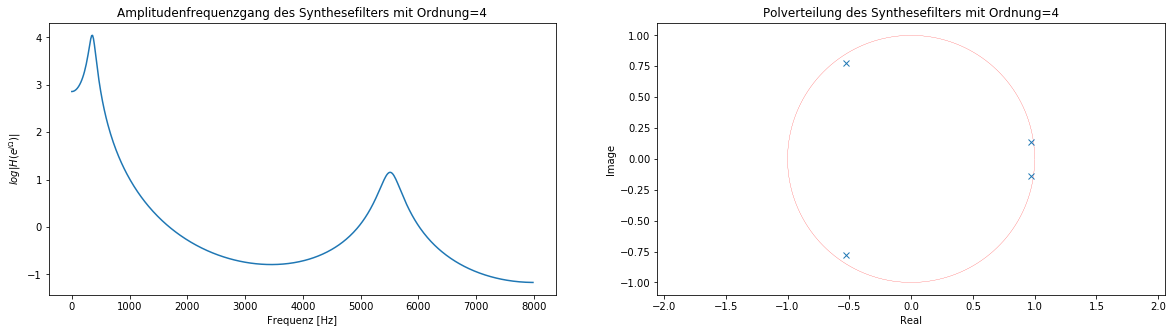

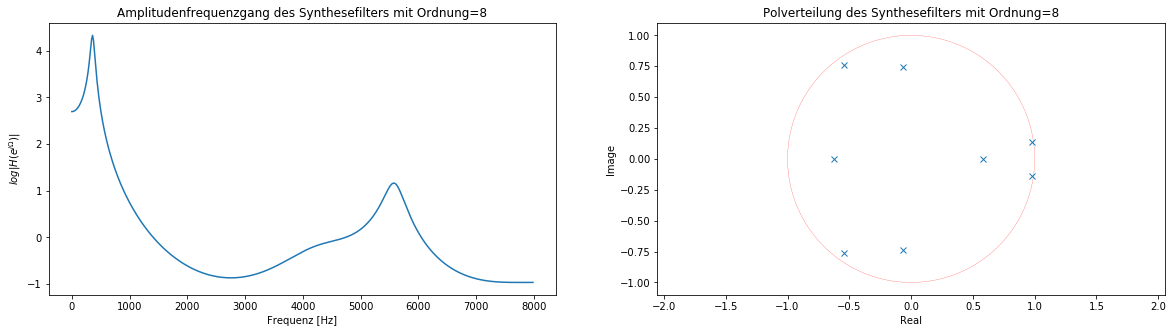

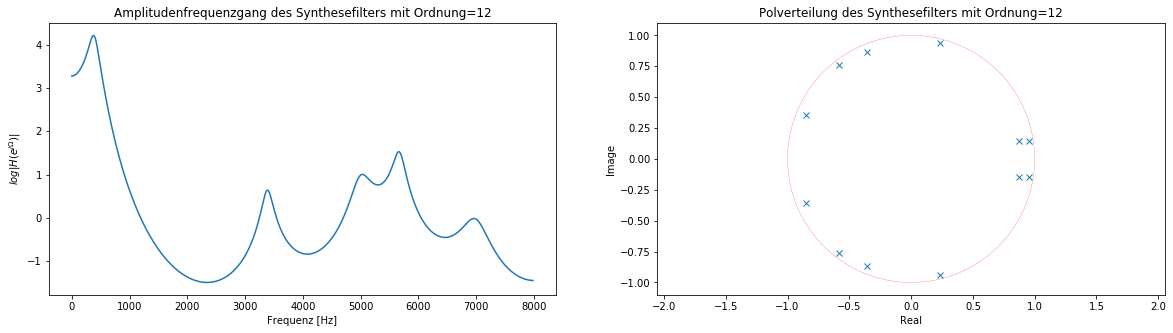

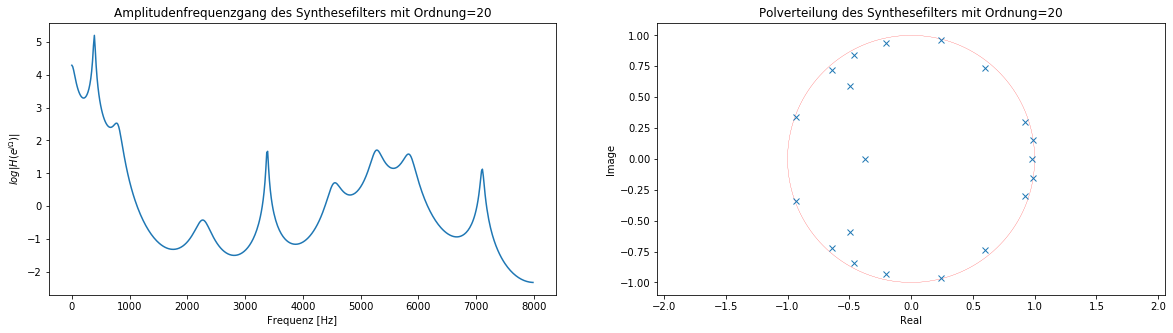

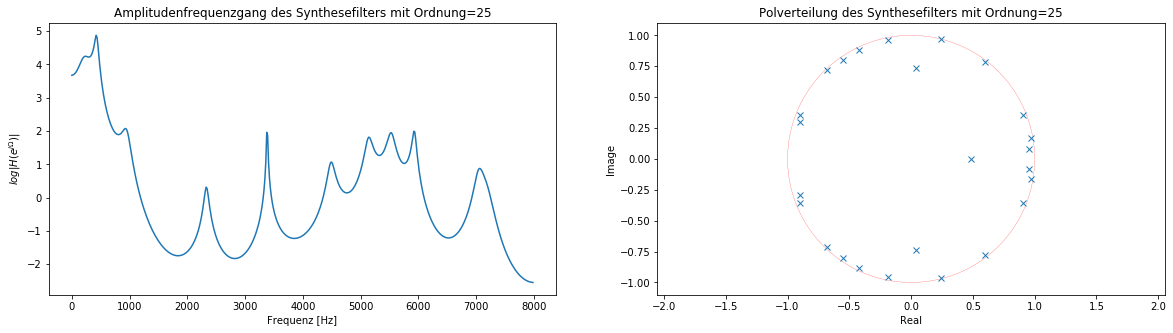

In [6]:
'''
Aufgabe: Die LP-Koeffizienten des /u/-Segments mit verschiedenen Ordnungen berechnen und
          die Frequenzgang bzw. Null-Pol Verteilung des Synthesefilters aufzeichnen
'''
for N in (4, 8, 12, 20, 25):  
    b, a = [1], librosa.lpc(u_segment, N)            # LP-Koeffizienten bestimmen
    fH_Hz, H = scipy.signal.freqz(b, a, fs=fs_Hz)    # Amplitudenfrequenzgang
    z, p, k = scipy.signal.tf2zpk(b, a)              # Null-Pol Verteilung

    # Graphische Darstellung
    plt.subplot(121)
    plt.title('Amplitudenfrequenzgang des Synthesefilters mit Ordnung=%d' %N)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('$log|H(e^{jΩ})|$')
    plt.plot(fH_Hz, np.log(np.abs(H)))
    plt.subplot(122)
    plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
    plt.plot(np.real(p), np.imag(p), 'x')
    plt.axis("equal")
    plt.gcf().set_size_inches(20, 5)
    plt.show()

Nach der Vorsesung ist die Richtlinie für die Wahl der Modellordnung: Es werden etwas mehr als doppelt soviele Prädiktorkoeffizienten benötigt, wie Formanten bis zur Nyquist-Frequenz erwartet werden. D.h., Modellordnung N ≈ Abtastfrequenz in kHz + 3.

----

### References

1. Titelbild von [Justin Stoltzfus](https://www.dataversity.net/voice-processing-are-we-near-new-speech-recognition-apps/#), [Emflazie](https://en.wikipedia.org/wiki/Source%E2%80%93filter_model#/media/File:Source-filter_model_diagram.svg), [adaptivedigital](https://www.adaptivedigital.com/lpc/)   
2. [Linear predictive coding](https://en.wikipedia.org/wiki/Linear_predictive_coding)
3. [Introduction - Linear predictive coding](http://support.ircam.fr/docs/AudioSculpt/3.0/co/LPC.html)  